# Load Libraries

In [1]:
import sys
import os
import math
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import re
import gc

# Load Data

In [5]:
sstage = 11
lstage = 65
stages = [x for x in range(sstage, lstage+1)]
#phs = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5]
phs = [4.0, 5.0, 6.0, 7.0, 8.0]

In [6]:
reload = []
for n, ph in enumerate(phs):
    reload_sub = []
    for stage in stages:
        with open('data/pH_{}_stage_{}.dat'.format(ph, stage), 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split('\s+', line)
                    split_line = split_line[:-1]
                    reload_sub.append(float(split_line[0]))
    reload.append(reload_sub)

## Time Series

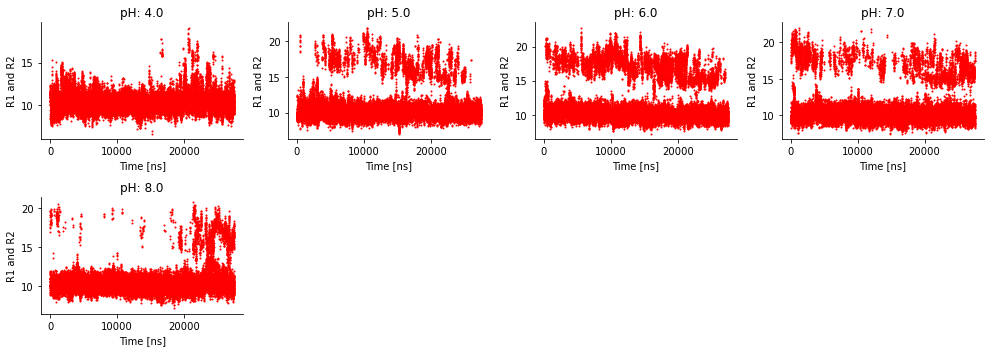

In [7]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            # reload
            axes[index].plot([x for x in range(len(reload[index]))], reload[index], 'r.', markersize = 2)
            # Plot Details 
            axes[index].set_xlabel('Time [ns]')
            axes[index].set_ylabel('R1 and R2')
            axes[index].set_title('pH: {}'.format(phs[index]))
        
            axes[index].spines['right'].set_visible(False)
            axes[index].spines['top'].set_visible(False)
            #axes[index].set_ylim(2, 6)
            #axes[index].set_xlim(0, 8.0)
        else:
            axes[index].remove()

fig.tight_layout()
#plt.savefig('BB_rmsd_ts.pdf')
plt.show()


## Histograms

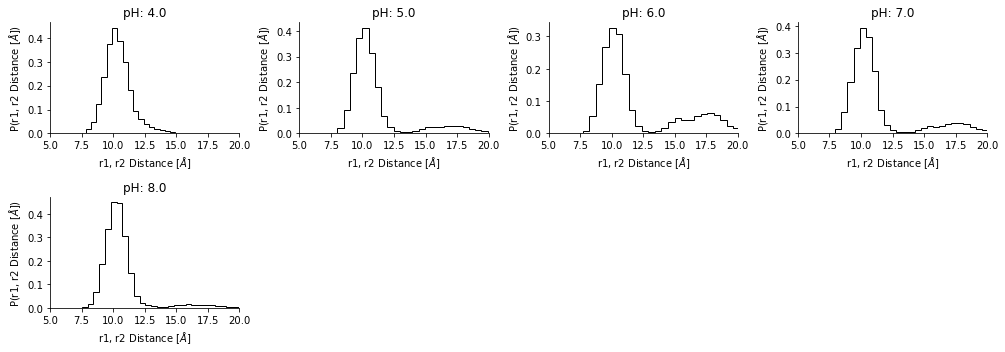

In [8]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            # reload
            axes[index].hist(reload[index], bins=30, density=True, histtype='step', color=['Black'])
            
            # Plot Details
            axes[index].set_xlabel('r1, r2 Distance [$\AA$]')
            axes[index].set_ylabel('P(r1, r2 Distance [$\AA$])')
            axes[index].set_title('pH: {}'.format(phs[i*figcols+j]))            
            axes[index].spines['right'].set_visible(False)
            axes[index].spines['top'].set_visible(False)
            #axes[index].set_ylim(0, 
            axes[index].set_xlim(5, 20)
        else:
            axes[index].remove()

fig.tight_layout()
#plt.savefig('D156-K305_SB_Dist_Histo_IF.png', dpi=360)
plt.show()

In [15]:
final_data = [] 
for n, ph in enumerate(phs):
    opened = 0
    closed = 0
    for dat in reload[n]:
        if dat < 13:
            closed += 1
        if dat > 13:
            opened += 1
    final_data.append([ph, opened/len(reload[n]), closed/len(reload[n])])

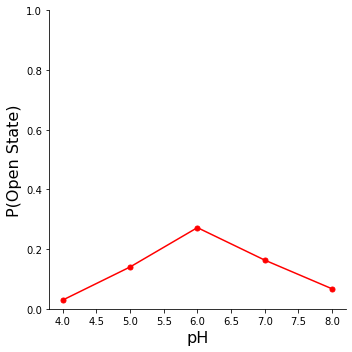

In [16]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('P(Open State)', fontsize=16)

axes.plot([x[0] for x in final_data], [y[1] for y in final_data], 'ro-', markersize = 5)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, 1)


fig.tight_layout()
#plt.savefig("HB_D34.pdf")
plt.show()

# Load H161 Interaction Data

In [11]:
path = '/home/jackh/plasmepsin/explaining_H161_pka_revisted/apo/data'
H161_data = []
for n, ph in enumerate(phs):
    H161_data_sub = []
    for stage in stages:
        with open('{}/pH_{}_stage_{}.dat'.format(path, ph, stage), 'r') as f:
            for line in f:
                if "#" not in line:
                    split_line = re.split('\s+', line)
                    split_line = split_line[:-1]
                    H161_data_sub.append([float(split_line[0]), float(split_line[1])])
    H161_data.append(H161_data_sub)

## Process Data

In [12]:
opened_closed = []
open_H161   = []
close_H161 = []
cutoff = 3.5
for n, ph in enumerate(phs):
    open_H161_sub  = []
    open_total = 0
    open_count = 0
    close_H161_sub = []
    close_total = 0
    close_count = 0
    for H161, flap in zip(H161_data[n], reload[n]):
        # Open 
        if flap > 13:
            open_H161_sub.append(H161)
            open_total += 1
            if H161[0] < cutoff or H161[1] < cutoff:
            #if H161[0] < cutoff:
            #if H161[1] < cutoff:
                open_count += 1
        # Closed
        if flap < 13:
            close_H161_sub.append(H161)
            close_total += 1
            if H161[0] < cutoff or H161[1] < cutoff:
            #if H161[0] < cutoff:
            #if H161[1] < cutoff:
                close_count += 1
    open_H161.append(open_H161_sub)
    close_H161.append(close_H161_sub)
    opened_closed.append([ph, open_count/open_total, close_count/close_total])
    print(f'pH: {ph}, Open: {open_count/open_total:0.2f}, Close: {close_count/close_total:0.2f}')

pH: 4.0, Open: 0.62, Close: 0.66
pH: 5.0, Open: 0.38, Close: 0.61
pH: 6.0, Open: 0.36, Close: 0.35
pH: 7.0, Open: 0.33, Close: 0.18
pH: 8.0, Open: 0.05, Close: 0.07


In [13]:
holo_path = '/home/jackh/plasmepsin/explaining_H161_pka_revisted/holo'
holo_data = []
with open('{}/closed.dat'.format(holo_path), 'r') as f:
    for line in f:
        split_line = re.split('\s+', line)
        split_line = split_line[:-1]
        holo_data.append([float(split_line[0]), float(split_line[1])])

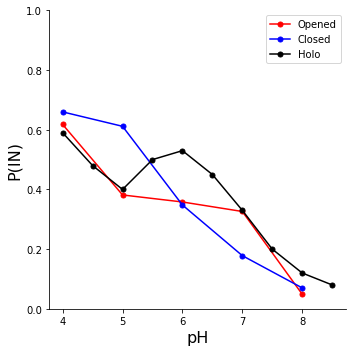

In [14]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

legend = ['Opened', 'Closed', 'Holo']

axes.set_xlabel('pH', fontsize=16)
axes.set_ylabel('P(IN)', fontsize=16)

axes.plot([x[0] for x in opened_closed], [y[1] for y in opened_closed], 'ro-', markersize = 5)
axes.plot([x[0] for x in opened_closed], [y[2] for y in opened_closed], 'bo-', markersize = 5)
axes.plot([x[0] for x in holo_data], [y[1] for y in holo_data], 'ko-', markersize = 5)

axes.legend(legend)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, 1)


fig.tight_layout()
#plt.savefig("HB_D34.pdf")
plt.show()

Save Data

In [20]:
#with open('P_H161_in_Electo_Pocket_Apo_Flap_Open_Closed_S11_to_65_Holo_S21_to_42.dat', 'w') as o:
#    o.write('# pH, Apo Open State, Apo Closed State, Holo \n')
#    for apo, holo in zip(opened_closed, holo_data):
#        o.write(f'{apo[0]} {apo[1]:0.2f} {apo[2]:0.2f} {holo[1]:0.2f} \n')

## Opened

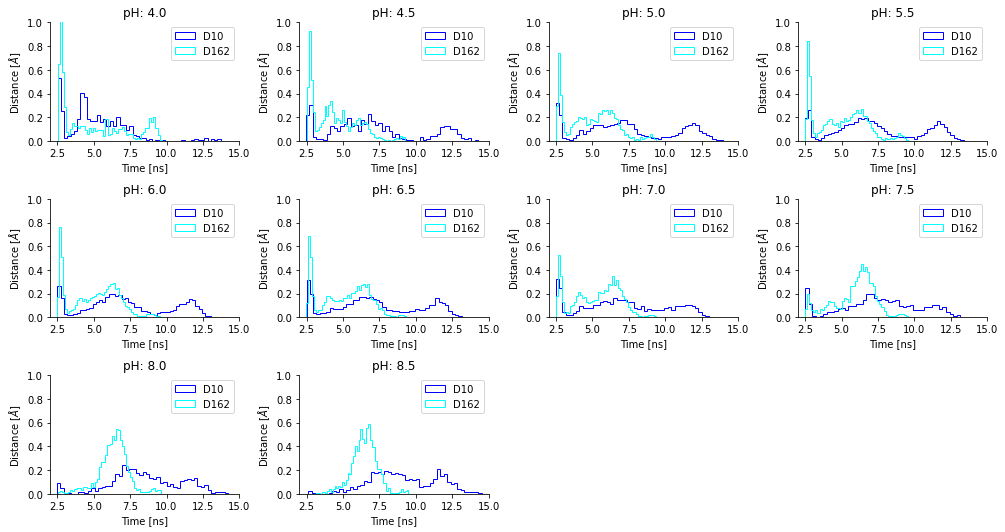

In [12]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

legend = ['D10', 'D162']

for index in range(figrows*figcols):
    if index < len(phs):
        # open_H161
        axes[index].hist([y[0] for y in open_H161[index]], bins=50, color='blue', density=True, histtype='step')
        axes[index].hist([y[1] for y in open_H161[index]], bins=50, color='cyan', density=True, histtype='step')
        #axes[index].vlines(7, 0, 0.5, color='black')
        # Plot Details 
        axes[index].legend(legend)
        axes[index].set_title('pH: {}'.format(phs[index]))
        axes[index].set_xlabel('Time [ns]')
        axes[index].set_ylabel('Distance [$\AA$]')
        # X and Y Range
        axes[index].set_ylim(0, 1)
        axes[index].set_xlim(2, 15)
        axes[index].spines['right'].set_visible(False)
        axes[index].spines['top'].set_visible(False)
    else: 
        axes[index].remove()

    
fig.tight_layout()
plt.show()

# Closed

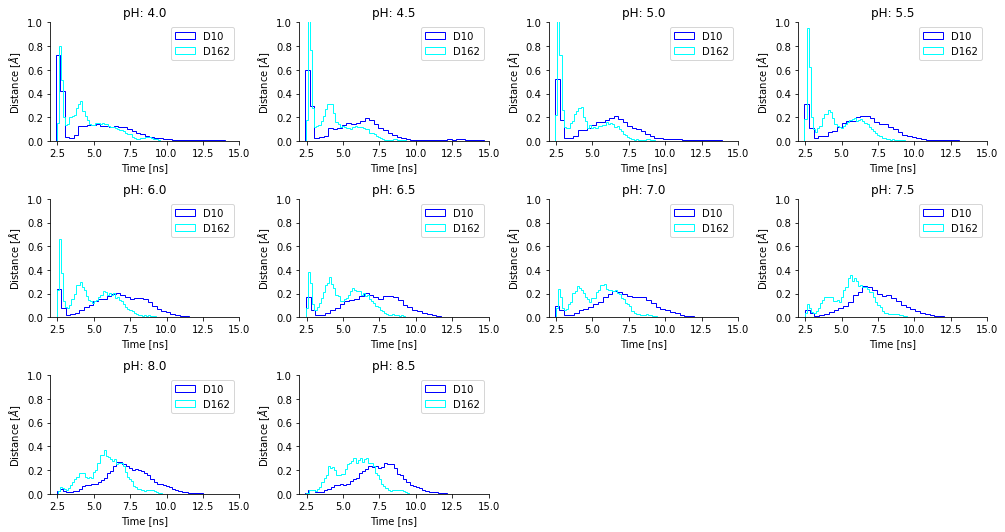

In [13]:
# Fold Cell
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

legend = ['D10', 'D162']

for index in range(figrows*figcols):
    if index < len(phs):
        # close_H161
        axes[index].hist([y[0] for y in close_H161[index]], bins=50, color='blue', density=True, histtype='step')
        axes[index].hist([y[1] for y in close_H161[index]], bins=50, color='cyan', density=True, histtype='step')
        #axes[index].vlines(7, 0, 0.5, color='black')
        # Plot Details 
        axes[index].legend(legend)
        axes[index].set_title('pH: {}'.format(phs[index]))
        axes[index].set_xlabel('Time [ns]')
        axes[index].set_ylabel('Distance [$\AA$]')
        # X and Y Range
        axes[index].set_ylim(0, 1)
        axes[index].set_xlim(2, 15)
        axes[index].spines['right'].set_visible(False)
        axes[index].spines['top'].set_visible(False)
    else: 
        axes[index].remove()

    
fig.tight_layout()
plt.show()